# Data Exploration
- The dataset contains data on age, ethnicity, education level, personality traits and finally, which will be resolved at the end of the project, the level of consumption of certain drugs

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/raw/Drug_Consumption.csv', sep=',')
df.head(3)

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,AScore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,2,25-34,M,Doctorate degree,UK,White,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
1,3,35-44,M,Professional certificate/ diploma,UK,White,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
2,4,18-24,F,Masters degree,UK,White,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0


In [3]:
df.shape

(1884, 32)

In [4]:
df.duplicated().sum()

np.int64(0)

In [5]:
df.isna().sum().sum()

np.int64(0)

In [6]:
df.dtypes

ID             int64
Age           object
Gender        object
Education     object
Country       object
Ethnicity     object
Nscore       float64
Escore       float64
Oscore       float64
AScore       float64
Cscore       float64
Impulsive    float64
SS           float64
Alcohol       object
Amphet        object
Amyl          object
Benzos        object
Caff          object
Cannabis      object
Choc          object
Coke          object
Crack         object
Ecstasy       object
Heroin        object
Ketamine      object
Legalh        object
LSD           object
Meth          object
Mushrooms     object
Nicotine      object
Semer         object
VSA           object
dtype: object

## Gender

<BarContainer object of 2 artists>

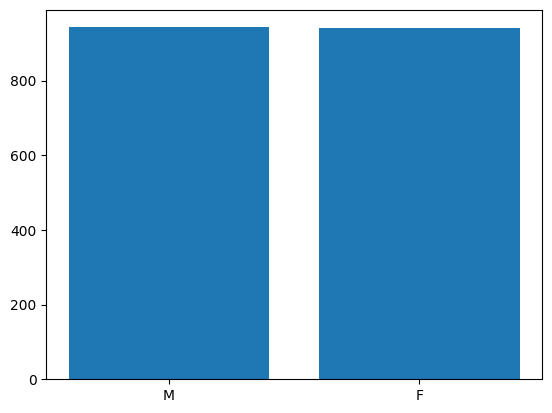

In [7]:
plt.bar(df['Gender'].value_counts().index, df['Gender'].value_counts().values)

# Education

In [8]:
df['Education'].value_counts()

Education
Some college or university, no certificate or degree    506
University degree                                       480
Masters degree                                          283
Professional certificate/ diploma                       269
Left school at 18 years                                 100
Left school at 16 years                                  99
Doctorate degree                                         89
Left school at 17 years                                  30
Left school before 16 years                              28
Name: count, dtype: int64

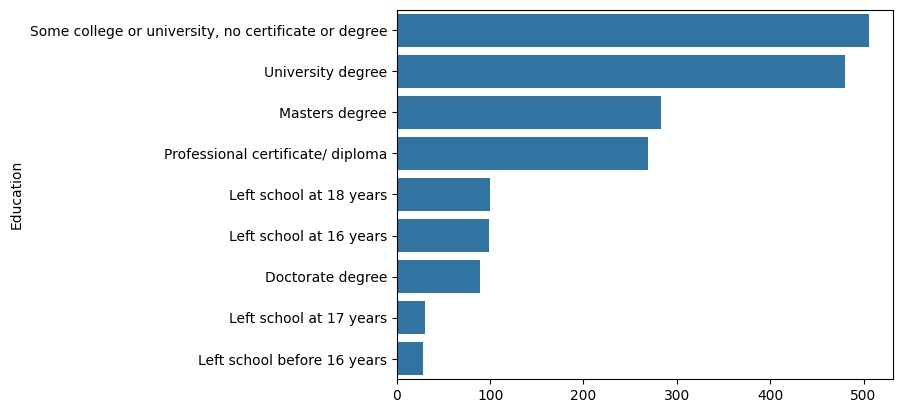

In [9]:
sns.barplot(x=df['Education'].value_counts().values, y=df['Education'].value_counts().index);

## Country

In [10]:
df['Country'].value_counts()

Country
UK                     1043
USA                     557
Other                   118
Canada                   87
Australia                54
Republic of Ireland      20
New Zealand               5
Name: count, dtype: int64

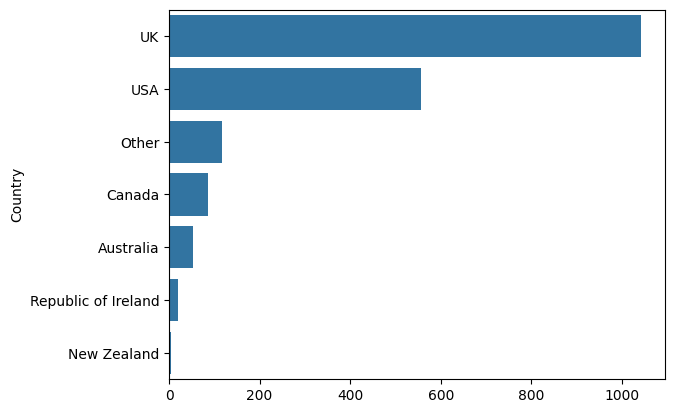

In [11]:
sns.barplot(x=df['Country'].value_counts().values, y=df['Country'].value_counts().index);

## Ethnicity

In [12]:
df['Ethnicity'].value_counts()

Ethnicity
White                1720
Other                  63
Black                  33
Asian                  26
Mixed-White/Black      20
Mixed-White/Asian      19
Mixed-Black/Asian       3
Name: count, dtype: int64

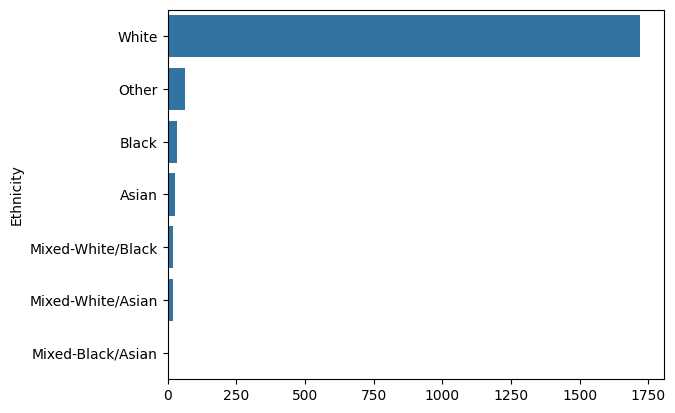

In [13]:
sns.barplot(x=df['Ethnicity'].value_counts().values, y=df['Ethnicity'].value_counts().index);

## Personality Traits

- Nscore, Escore, Oscore, AScore, Cscore, Impulsive and SS are psychological variables that represent personality traits and behavior

- Big Five:

    - OScore | Openness: 
        - Measures curiosity, creativity and openness to new ideas.
    
    - CScore |Conscientiousness: 
        - Measures discipline, organization and sense of duty.

    - EScore | Extraversion: 
        - Measures sociability, energy and tendency to seek external stimuli.

    - AScore | Agreeableness:
        - Measures empathy, cooperation and trust in others.

    - NScore | Neuroticism:
        - Measures the tendency towards negative emotions, such as anxiety and emotional instability.

- These five factors are widely accepted in psychology and form the so-called OCEAN model

- Additional behavioral traits
    - Impulsivity: 
        - Measures the tendency to act without thinking, seeking immediate gratification.

    - SS | Sensation:
        - Measures the need for new and intense experiences, even if risky. 

- **How to Calculate**:

    - Participants answer standardized psychological questionnaires:
        - Big Five traits (Nscore, Escore, Oscore, AScore, Cscore): measured using the NEO-FFI test (50 items).

        - Impulsive: measured using the Barratt Impulsiveness Scale (BIS).

        - SS (Sensation Seeking): measured using the Sensation Seeking Scale (SSS).

    - Each question is rated on a Likert scale, responses for each trait are summed to produce a raw score for that personality dimension.

    - Standardization (normalization):
        - Because the original raw scores are on different scales, they are converted into z-scores using:

            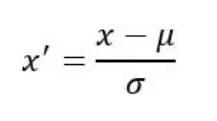

            - x = individual's raw score
            - μ = mean score across all participants
            - σ = standard deviation of all scores

        - Each variable (Nscore, Escore, etc.) has a mean of 0 and standard deviation of 1.

        - Most values fall between −3 and +3.

        - Positive z-scores mean above-average personality traits, and negative ones mean below-average traits.


In [ ]:
# Standard scaler
df[['Oscore', 'Cscore', 'Escore', 'AScore', 'Nscore']].describe()

,Oscore,Cscore,Escore,AScore,Nscore
count,1884.000000,1884.000000,1884.000000,1884.000000,1884.000000
mean,-0.000225,-0.000383,0.000143,0.000242,-0.000119
std,0.996402,0.997787,0.997625,0.997481,0.998345
min,-3.273930,-3.464360,-3.273930,-3.464360,-3.464360
25%,-0.717270,-0.652530,-0.695090,-0.606330,-0.678250
50%,-0.019280,-0.006650,0.003320,-0.017290,0.042570
75%,0.723300,0.584890,0.637790,0.760960,0.629670
max,2.901610,3.464360,3.273930,3.464360,3.273930


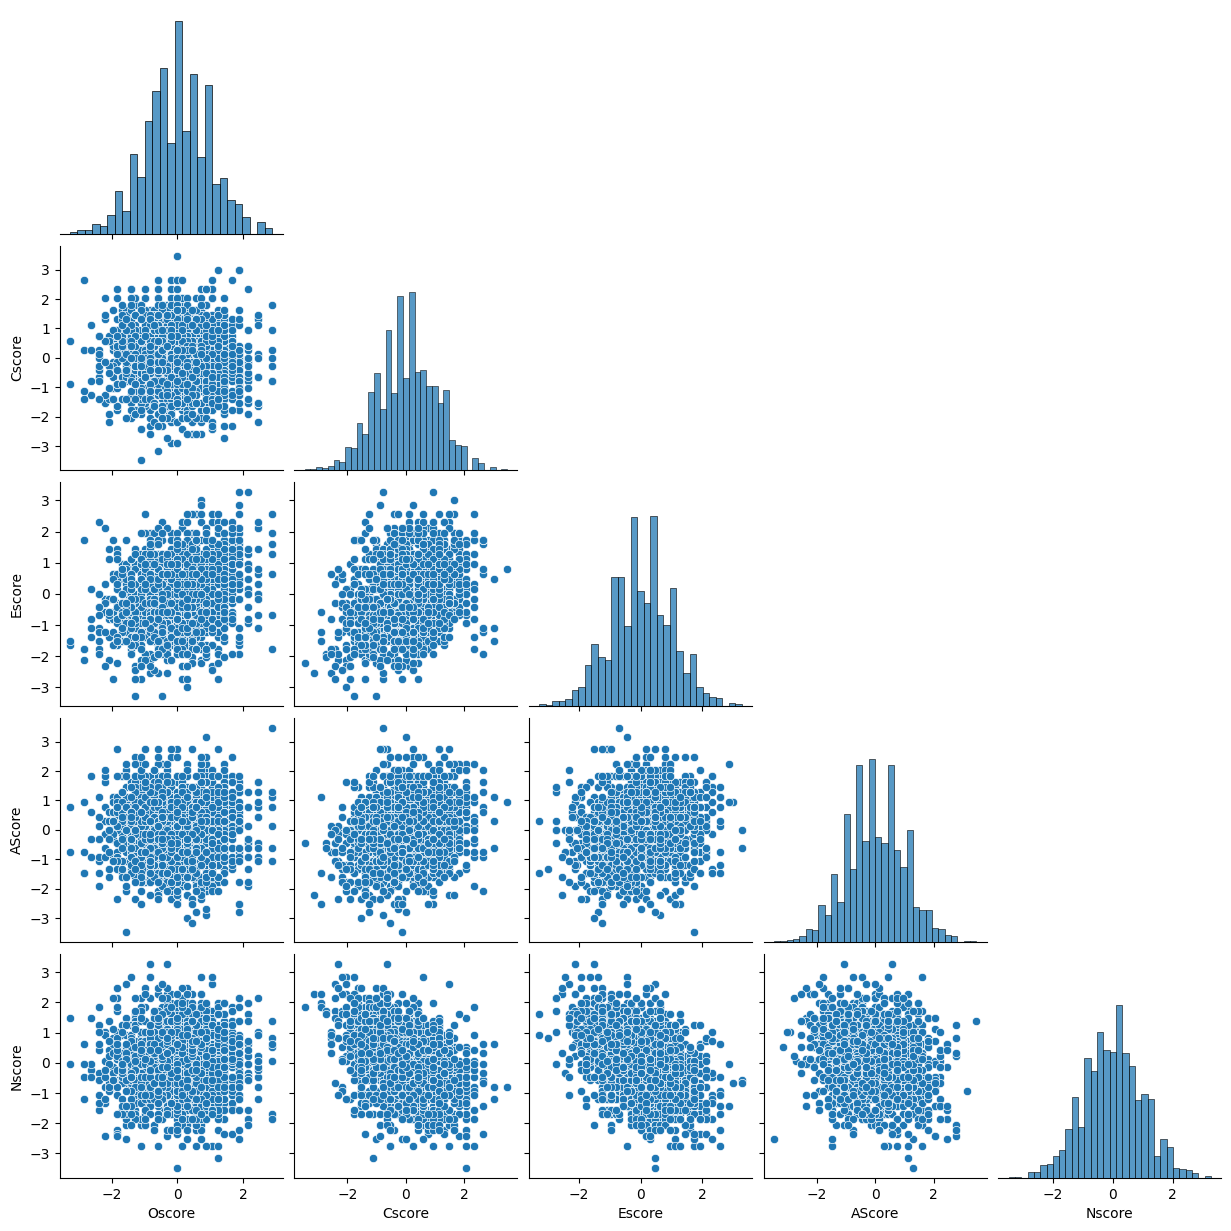

In [19]:
sns.pairplot(df[['Oscore', 'Cscore', 'Escore', 'AScore', 'Nscore']], corner=True);

## Drugs

- Dataset usege frequency encoding:

    - **CL0**: Never Used
    - **CL1**: Used over a Decade Ago
    - **CL2**: Used in Last Decade
    - **CL3**: Used in Last Year
    - **CL4**: Used in Last Month
    - **CL5**: Used in Last Week
    - **CL6**: Used in Last Day

Text(0, 0.5, 'Frequency')

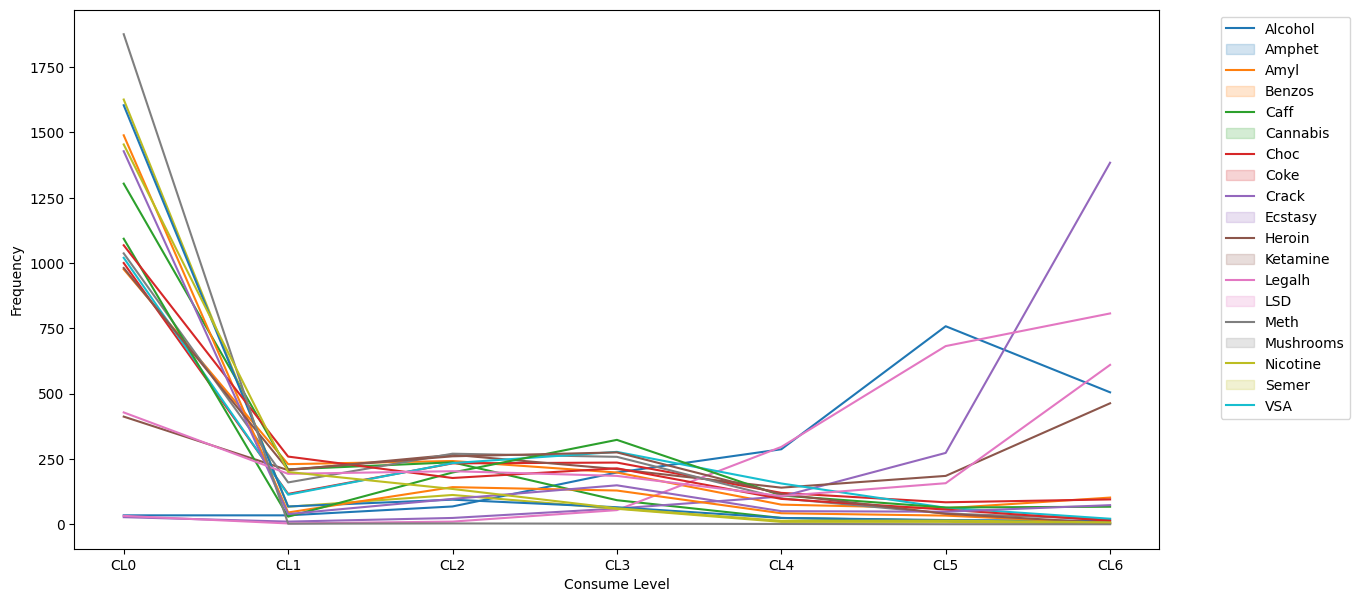

In [105]:
columns = ['Alcohol','Amphet','Amyl','Benzos','Caff','Cannabis','Choc',
          'Coke','Crack','Ecstasy','Heroin','Ketamine','Legalh','LSD',
          'Meth','Mushrooms','Nicotine','Semer','VSA']

plt.figure(figsize=(14, 7))
for col in columns:
    df[col] = pd.Categorical(df[col], categories=['CL0', 'CL1', 'CL2', 'CL3', 'CL4', 'CL5', 'CL6'], ordered=True)
    sns.lineplot(x=df[col].value_counts().index, y=df[col].value_counts().values);

plt.legend(columns, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Consume Level')
plt.ylabel('Frequency')